# 5I-IN7 : Projet Dogs and Cats

L'objectif de ce jupyter notebook va être d'évaluer la capacité de notre IA à reconnaitre et faire la différence entre les chiens et la chats à l'aide d'un model classification SVM, l'autre jupyter notebook va être effectué avec un CNN. Nous allons comparer les resultats

## On importe les librairies utilisées plus tard

In [56]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import cv2
from scipy.cluster.vq import kmeans,vq
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

## On lis le dossier contenant les images pour entrainer notre IA

In [57]:
train_path="dataset/training_set"
test_path="dataset/test_set"
class_names=os.listdir(train_path)

print(class_names) # ==> ['dogs', 'cats']

image_paths=[]
image_classes=[]

['cats', 'dogs']


## dans ce bloc apparaîtron toutes les fonctions

In [58]:
# Fonction pour retourner le chemin de toutes les images avec un dossier
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

# Fonction pour tracer les pointsclés 
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

In [59]:
for training_name in class_names:
    dir_= os.path.join(train_path,training_name)
    class_path = img_list(dir_)
    image_paths += class_path

## la liste contient le chemin de toutes les images de chien et de chat

In [60]:
print(len(image_paths))

8000


In [61]:
image_classes_dog=[0]*(len(image_paths)//2) # on crée tableau contenant des 0 (chien) de 4000 éléments (on a 8000 images, soit la moitié)

image_classes_cat=[1]*(len(image_paths)//2) # on crée tableau contenant des 1 (chat) de 4000 éléments (on a 8000 images, soit la moitié)

image_classes=image_classes_dog+image_classes_cat # on concatène les tableaux pour avoir nos 8000 éléments



In [62]:
# print(image_classes) liste de 4000 0 suivis de 4000 1

In [63]:
dataset_train=[]

for i in range(len(image_paths)):
    dataset_train.append((image_paths[i],image_classes[i])) # on associe le chemin de l'image à son animal (1 pour chat, 0 pour chien)

# une fois ceci fait, nous allons pouvoir effectuer la même chose avec les chemins test

In [64]:
image_paths.clear()
for training_name in class_names:
    dir_= os.path.join(test_path,training_name)
    class_path = img_list(dir_)
    image_paths += class_path
print(len(image_paths))

2000


In [65]:
image_classes_dog=[0]*(len(image_paths)//2) # on crée tableau contenant des 0 (chien) de 1000 éléments (on a 2000 images, soit la moitié)

image_classes_cat=[1]*(len(image_paths)//2) # on crée tableau contenant des 1 (chat) de 1000 éléments (on a 2000 images, soit la moitié)

image_classes=image_classes_dog+image_classes_cat # on concatène les tableaux pour avoir nos 2000 éléments

In [66]:
# print(image_classes) liste de 2000 0 suivis de 2000 1

In [67]:
dataset_test=[]

for i in range(len(image_paths)):
    dataset_test.append((image_paths[i],image_classes[i])) # on associe le chemin de l'image à son animal (1 pour chat, 0 pour chien)

In [68]:
print(dataset_train[0]) # cat1 , 0
print(dataset_train[3999]) # cat999 , 0
print(dataset_train[4000]) # dog1 , 1
print(dataset_train[7999]) # dog999 , 1

('dataset/training_set\\cats\\cat.1.jpg', 0)
('dataset/training_set\\cats\\cat.999.jpg', 0)
('dataset/training_set\\dogs\\dog.1.jpg', 1)
('dataset/training_set\\dogs\\dog.999.jpg', 1)


In [69]:
print(dataset_test[0])
print(dataset_test[999])
print(dataset_test[1000])
print(dataset_test[1999])

('dataset/test_set\\cats\\cat.4001.jpg', 0)
('dataset/test_set\\cats\\cat.5000.jpg', 0)
('dataset/test_set\\dogs\\dog.4001.jpg', 1)
('dataset/test_set\\dogs\\dog.5000.jpg', 1)


# on mélange aléatoirement notre dataset, on va s'entrainer sur 8000 éléments d'entrainement et tester sur les 2000 du test

In [70]:
random.shuffle(dataset_train) # 
random.shuffle(dataset_test) 
train = dataset_train # on s'entraine sur 8000 éléments d'entrainement
test = dataset_test # on va tester sur les 2000 éléments de test

In [71]:
print(train[1])
print(test[1])

('dataset/training_set\\cats\\cat.1727.jpg', 0)
('dataset/test_set\\cats\\cat.4338.jpg', 0)


In [72]:
image_paths_train, y_train = zip(*train) # = for i in range(len(train)) train[i][0] , train[i][1] pour chaque tuple dans la liste, on met les éléments dans deux listes distinct
image_paths_test, y_test = zip(*test) # = for i in range(len(test)) test[i][0] , test[i][1]

In [73]:
print(len(image_paths_train))
print(len(image_paths_test))

8000
2000


# on créé ensuite l'orb, qui va permettre de détourer les animaux sur les images grâces aux couleurs, on affiche une image avec matplotlib pour tester

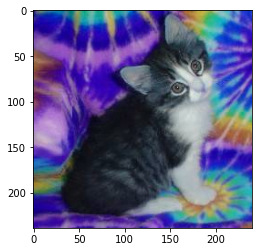

In [74]:
orb=cv2.ORB_create() 

im=cv2.imread(image_paths_train[1])  

plt.imshow(im) # ==> <matplotlib.image.AxesImage at >

# On trace les points autour de l'image precedemment testé

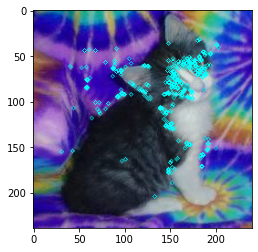

In [75]:
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img= draw_keypoints(im,kp)

# On ajoutes les descriptors des images d'entrainement dans une liste

In [76]:
descri_list = []
counter = 0
for path in image_paths_train:
    im=cv2.imread(path)
    kp=orb.detect(im,None)
    keypoints,descriptor = orb.compute(im, kp)
    if str(type(descriptor)) != "<class 'NoneType'>": # certains descriptor sont null et cela provoque des erreurs avec la concatenation plus tard
        descri_list.append((path,descriptor))
    else:
        counter += 1
    

In [77]:
print(f"Nombre de descriptor NoneType: {counter}")
print(f"Longueur descriptor liste: {len(descri_list)}")

Nombre de descriptor NoneType: 13
Longueur descriptor liste: 7987


In [78]:
descriptors = descri_list[0][1]
print(f"premier discriptor {descriptors}")
print(f"taille {len(descriptors)}")
counter2 = 0

for image_path,descriptor in descri_list[1:]:
    counter2 += 1
    np.vstack((descriptors,descriptor))
    
print(f"element parcouru: {counter2}")
print(f"taille de descriptors {np.shape(descriptors)}")
descriptors.shape 


descriptors_float=descriptors.astype(float)

premier discriptor [[130 159  44 ...   4 185 223]
 [167  76 122 ... 191 120 132]
 [239  72 163 ...  31  61 198]
 ...
 [ 64 247 147 ...  82 135 123]
 [253  71 117 ... 242 114 105]
 [ 57 157  32 ...  78 216 142]]
taille 365
element parcouru: 7986
taille de descriptors (365, 32)


# On utilise le Kmeans pour l'optimisation des descriports, qui contiennent les infos de détourage de nos image

In [79]:
k=200
voc, variance= kmeans(descriptors_float, k, 1)

# On créer l'histogramme des images d'entrainement

In [80]:
im_features = np.zeros((len(image_paths_train),k),"float32")


for i in range(len(descri_list)):
    animals, distance =vq(descri_list[i][1], voc)
    for elt in animals:
        im_features[i][elt]+=1

# On applique ensuite l'entrainement

In [81]:

        
stdslr = StandardScaler().fit(im_features)
im_features = stdslr.transform(im_features)



# On créer le model de classification SVM

In [82]:


clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

# On test le model de classification, on créer les descriptors avec orb comme précedemment

In [83]:


descri_list_test=[]
counter_test = 0     
for path in image_paths_test:
    image = cv2.imread(path)
    kp = orb.detect(image,None)
    keypoints_test, descriptor_test = orb.compute(image, kp)
    if str(type(descriptor_test)) != "<class 'NoneType'>": # certains descriptor sont null et cela provoque des erreurs avec la concatenation plus tard
        descri_list_test.append((path,descriptor_test))
    else:
        counter_test += 1
            
len(image_paths_test) # ==> 40


2000

In [84]:
print(f"Nombre de descriptor NoneType: {counter_test}")
print(f"Longueur descriptor test liste: {len(descri_list_test)}")

Nombre de descriptor NoneType: 3
Longueur descriptor test liste: 1997


In [85]:
test_features = np.zeros((len(image_paths_test),k),"float32")

for i in range(len(descri_list_test)):
    animals,distance = vq(descri_list_test[i][1],voc)
    for elt in animals:
        test_features[i][elt]+=1

In [86]:
test_features = stdslr.transform(test_features)

true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("Cat")
    else:
        true_classes.append("Dog")

predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("Cat")
    else:
        predict_classes.append("Dog")

In [87]:
print(true_classes[:10])

['Dog', 'Dog', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat']


In [88]:
print(predict_classes[:10])

['Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat']


In [89]:
clf.predict(test_features)

array([1, 0, 1, ..., 0, 0, 0])

In [90]:
accuracy = accuracy_score(true_classes,predict_classes)
print(accuracy) 

0.496


# Interprétation

Comme nous pouvons le constater l'IA n'est pas très fiable, on peut expliquer cela au fait que les images de chiens et de chat sont très différente et que les descriptors issus de l'ORB détourre seulement ce qui semble ressembler à l'animal, de plus très peu de traitement sont effectués sur les images ce qui ne les rendent pas facile à utiliser pour l'apprentissage.